# Caminhos:

#### Adicionar caminho: sys.path.append('/eos/user/t/thenriqu/Dark_Matter/LGBM_hhdm_analysis/')

#### Amostras: /eos/user/t/thenriqu/Dark_Matter/Amostras/hhdmAnalysis_deepJet_Regions/datasets

#### Metadata: /eos/user/t/thenriqu/Dark_Matter/metadata.json

# Bibliotecas

In [1]:
import sys
sys.path.append('/eos/user/t/thenriqu/Dark_Matter/LGBM_hhdm_analysis/')

import pprint
import json
from pathlib import Path
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

import hepherolib.analysis as ana

from hhdm_analysis.utils import signal_label, stack_sorting, position, process_signals

ana.start()
plt.style.use("default")

# Configuração

In [2]:
period = '16'
year_style = 2016
dataset_year = "2016"
basedir = "/eos/user/t/thenriqu/Dark_Matter/Amostras/hhdmAnalysis_deepJet_Regions/datasets"

# Setup figure folders
dataset_name = basedir.split('/')[-2]
figures_path = f"./figures/{dataset_name}/{dataset_year}/machine_learning"
Path(figures_path).mkdir(parents=True, exist_ok=True)

# Data folder
data_path = f"./data/{dataset_name}/{dataset_year}"
Path(data_path).mkdir(parents=True, exist_ok=True)

# Lendo metadata

In [3]:
with open("/eos/user/t/thenriqu/Dark_Matter/metadata.json", "r") as f:
    metadata = json.load(f)

# Carregando datasets

In [4]:
base_model_name = "multi_signal"

with open(f"{data_path}/{base_model_name}-predicted-data.pickle", "rb") as f:
    ds = pickle.load(f)

# Preparando dataset para o plot

In [5]:
region_id = 0 # Signal region

# Prepare data to plot
colors_list = ["gainsboro", "orchid", "limegreen", "red", "skyblue", "darkgoldenrod"]
labels_list = [r"Residual SM", r"$WZ$", r"$ZZ$", "Single top", r"$t\bar{t}$", "Drell-Yan"]
bkg_list = ["Residual", "WZ", "ZZ", "ST", "TT", "DYJetsToLL"]
ds = {k: v[v.RegionID == region_id] for k,v in ds.items()}
dataframes, labels, colors = stack_sorting(ds, colors_list, labels_list, bkg_list)

      Datasets  Number of events
0  Residual SM        597.890318
1         $ZZ$        115.033450
2         $WZ$        221.638292
3   Single top       1533.004417
4   $t\bar{t}$       7388.193370
5    Drell-Yan      28989.369921
Purity: 0.7462806816324102


# Definindo variáveis para o plot

In [6]:
# Signals to use in plot
signal_to_use = process_signals([
    ("Signal_400_100", "darkviolet"),
    ("Signal_1000_100", "blue")
])

all_signals = process_signals([
    ("Signal_1000_100", "blue"),
    ("Signal_1000_200", "lightcoral"),
    ("Signal_1000_300", "chocolate"),
    ("Signal_1000_400", "darkorange"),
    ("Signal_1000_600", "moccasin"),
    ("Signal_1000_800", "goldenrod"),
    ("Signal_400_100", "darkviolet"),
    ("Signal_400_200", "yellowgreen"),
    ("Signal_500_100", "green"),
    ("Signal_500_200", "turquoise"),
    ("Signal_500_300", "darkcyan"),
    ("Signal_600_100", "cyan"),
    ("Signal_600_200", "indigo"),
    ("Signal_600_300", "violet"),
    ("Signal_600_400", "deeppink"),
    ("Signal_800_100", "crimson"),
    ("Signal_800_200", "red"),
    ("Signal_800_300", "saddlebrown"),
    ("Signal_800_400", "gainsboro"),
    ("Signal_800_600", "dimgray"),
])

# Variables to plot
var1 = "MLP_score_torch"
var2 = "LGB_score"
var3 = "MLP_score_keras"
xmin = 0
xmax = 1
nbins = 51
bins = np.linspace(xmin, xmax, nbins)

# Plot LGB

## Background vs Signal estudado

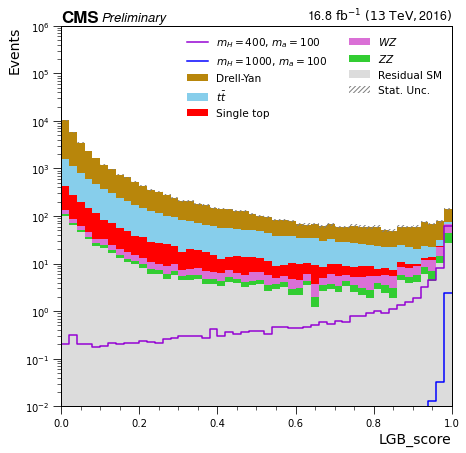

In [7]:
xlabel = "LGB_score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ybkg, errbkg = ana.stacked_plot(ax1, var2, dataframes, labels, colors, weight="evtWeight", bins=bins)

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e6]
)
plt.savefig(f"{figures_path}/{base_model_name}-{var2}.png", dpi=200, facecolor='white')
plt.show()
plt.close()


## Todos os sinais estudados

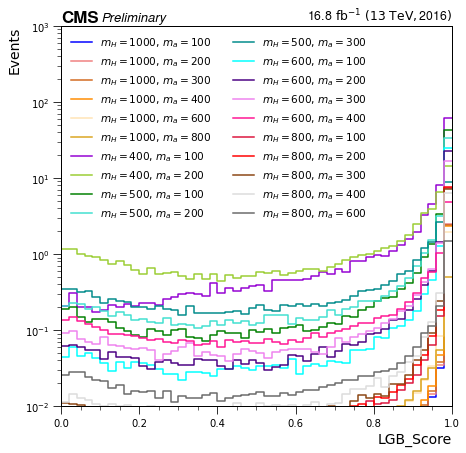

In [8]:
xlabel = "LGB_Score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in all_signals:
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e3], legend_loc="upper left"
)
plt.savefig(f"{figures_path}/{base_model_name}-{var2}-all_signals.png", dpi=200, facecolor='white')
plt.show()
plt.close()


# Plot MLP Keras

## Background vs signal estudado

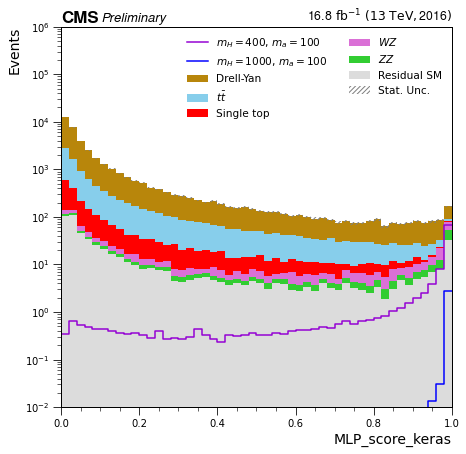

In [9]:
xlabel = "MLP_score_keras"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var3, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ybkg, errbkg = ana.stacked_plot(ax1, var3, dataframes, labels, colors, weight="evtWeight", bins=bins)

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e6]
)
plt.savefig(f"{figures_path}/{base_model_name}-{var3}.png", dpi=200, facecolor='white')
plt.show()
plt.close()


## Todos os sinais estudados

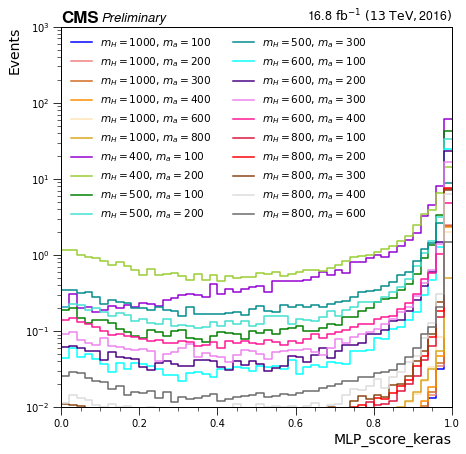

In [10]:
xlabel = "MLP_score_keras"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in all_signals:
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e3], legend_loc="upper left"
)
plt.savefig(f"{figures_path}/{base_model_name}-{var3}-all_signals.png", dpi=200, facecolor='white')
plt.show()
plt.close()


# Plot LGB vs MLP Keras

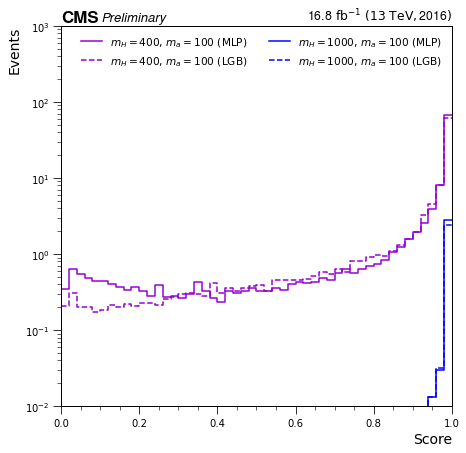

In [11]:
xlabel = "Score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var3, ds[signal["key"]],
        label=signal["label"] + " (MLP)", color=signal["color"],
        weight="evtWeight", bins=bins
    )
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"] + " (LGB)", color=signal["color"],
        weight="evtWeight", bins=bins, linestyle="--"
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e3]
)
plt.savefig(f"{figures_path}/{base_model_name}-discriminators-lgb-mlp-keras.png", dpi=200, facecolor='white')
plt.show()
plt.close()


# Compare os modelos deste trabalho com o modelo MLP usando pyTorch feito pelo Gilson

## Plot MLP Torch: Background vs signals estudado

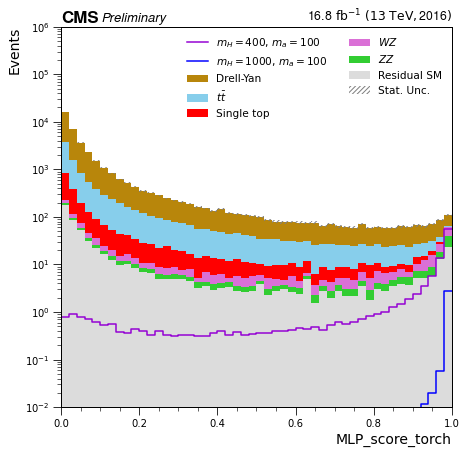

In [12]:
xlabel = "MLP_score_torch"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var1, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ybkg, errbkg = ana.stacked_plot(ax1, var1, dataframes, labels, colors, weight="evtWeight", bins=bins)

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e6]
)
plt.savefig(f"{figures_path}/{base_model_name}-{var1}.png", dpi=200, facecolor='white')
plt.show()
plt.close()


## Plot MLP Torch: all signals study

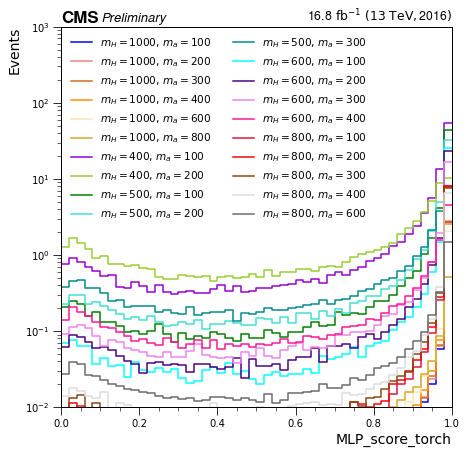

In [13]:
xlabel = "MLP_score_torch"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in all_signals:
    ana.step_plot(
        ax1, var1, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e3], legend_loc="upper left"
)
plt.savefig(f"{figures_path}/{base_model_name}-{var1}-all_signals.png", dpi=200, facecolor='white')
plt.show()
plt.close()


## Plot LGB vs MLP Torch

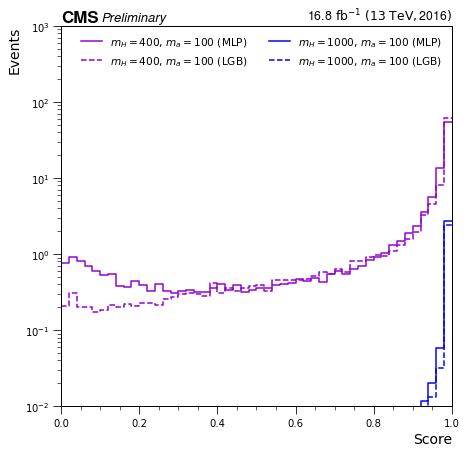

In [14]:
xlabel = "Score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var1, ds[signal["key"]],
        label=signal["label"] + " (MLP)", color=signal["color"],
        weight="evtWeight", bins=bins
    )
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"] + " (LGB)", color=signal["color"],
        weight="evtWeight", bins=bins, linestyle="--"
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e3]
)
plt.savefig(f"{figures_path}/{base_model_name}-discriminators-lgb-mlp-torch.png", dpi=200, facecolor='white')
plt.show()
plt.close()


## Plot MLP Keras vs MLP Torch

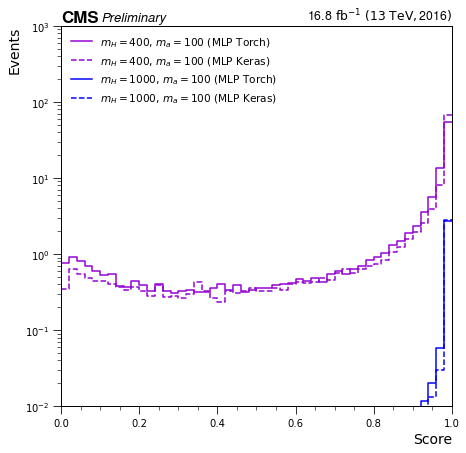

In [15]:
xlabel = "Score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var1, ds[signal["key"]],
        label=signal["label"] + " (MLP Torch)", color=signal["color"],
        weight="evtWeight", bins=bins
    )
    ana.step_plot(
        ax1, var3, ds[signal["key"]],
        label=signal["label"] + " (MLP Keras)", color=signal["color"],
        weight="evtWeight", bins=bins, linestyle="--"
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=1, ylim=[1.e-2,1.e3], legend_loc="upper left"
)
plt.savefig(f"{figures_path}/{base_model_name}-discriminators-mlp-keras-torch.png", dpi=200, facecolor='white')
plt.show()
plt.close()
